#**01 - exploración.ipynb**
#**Integrantes**
- SANTIAGO VILLEGAS NARANJO
- JENNY ANDREA OROZCO OSORIO
- XIOMARA GIRALDO PÉREZ

# **Se hace la exploración inicial de datos**

##**Librerias**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

#**Datos de Kaggle**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xiomaragiraldoprez","key":"50da545f662b50d5ea7101d95a348094"}'}

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.36GB/s]


#**Descompresión e inspección del archivo**

In [4]:
!unzip udea*.zip > /dev/null

#**Se carga el dataset :**
- Se carga el archivo train.csv

In [5]:
data = pd.read_csv("train.csv")

#**Exploración de datos**

In [6]:
data.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


#**Tamaño de los datos**

In [7]:
print ("Train", data.shape)

Train (692500, 21)


#**Información de los datos**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

#**Inspección de columnas numéricas**

In [9]:
data._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
ID,692500.0,494606.130576,285585.209455,1.0,247324.750,494564.500,741782.500,989286.000
PERIODO_ACADEMICO,692500.0,20198.366679,10.535037,20183.0,20195.000,20195.000,20203.000,20213.000
INDICADOR_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
INDICADOR_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
INDICADOR_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
INDICADOR_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


#**Valores faltantes en columnas**

In [10]:
k = data.isna().sum()
k[k!=0]

,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773
F_TIENEAUTOMOVIL,43623
E_PAGOMATRICULAPROPIO,6498
F_TIENECOMPUTADOR,38103
F_TIENEINTERNET.1,26629


#**Conteo del estrato**



In [11]:
data['F_ESTRATOVIVIENDA'].value_counts()

,count
F_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


#**Gráficos para RENDIMIENTO_GLOBAL**

<Axes: >

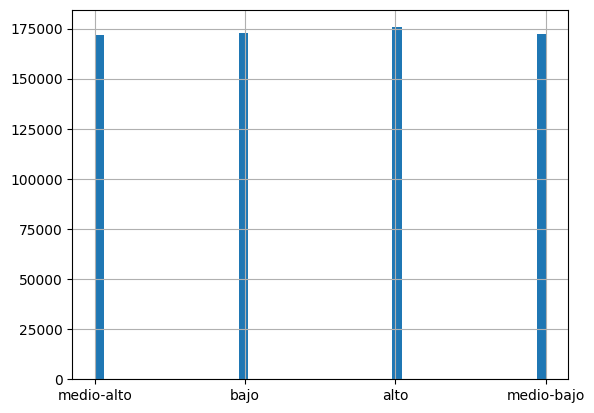

In [12]:
data['RENDIMIENTO_GLOBAL'].hist(bins=50)

<Axes: xlabel='RENDIMIENTO_GLOBAL'>

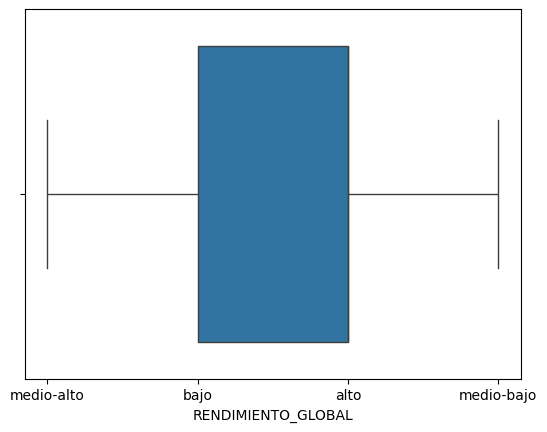

In [13]:
sns.boxplot(x=data['RENDIMIENTO_GLOBAL'])

#**Gráfico para ver cuántos tienen Internet vs. cuántos no**

<Axes: xlabel='F_TIENEINTERNET', ylabel='count'>

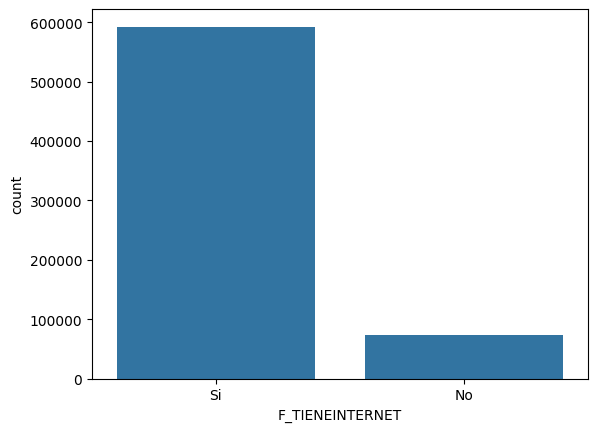

In [14]:
sns.countplot(x='F_TIENEINTERNET', data=data)

#**Inspeccionar variables categóricas**

In [15]:
ccols = [i for i in data.columns if not i in data._get_numeric_data()]
print (ccols)

['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']


In [16]:
for c in ccols:
    print ("%10s"%c, np.unique(data[c].dropna()))

E_PRGM_ACADEMICO ['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES'
 'ACTIVIDAD FISICA Y DEPORTE' 'ACUICULTURA' 'ADMINISTRACION'
 'ADMINISTRACION  FINANCIERA' 'ADMINISTRACION & SERVICIO'
 'ADMINISTRACION AERONAUTICA' 'ADMINISTRACION AGROPECUARIA'
 'ADMINISTRACION AMBIENTAL'
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES'
 'ADMINISTRACION BANCARIA Y FINANCIERA' 'ADMINISTRACION COMERCIAL'
 'ADMINISTRACION COMERCIAL Y DE MERCADEO'
 'ADMINISTRACION DE COMERCIO EXTERIOR' 'ADMINISTRACION DE EMPRESAS'
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL'
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES'
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS'
 'ADMINISTRACION DE EMPRESAS COMERCIALES'
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES'
 'ADMINISTRACION DE EMPRESAS TURISTICA'
 'ADMINISTRACION DE EMPRESAS TURISTICAS'
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS Y FINANZAS'
 'ADMINISTRACION DE GESTISN 

#**Conteo del RENDIMIENTO_GLOBAL**

In [17]:
data['RENDIMIENTO_GLOBAL'].value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


#**Distribución del Rendimiento Global**

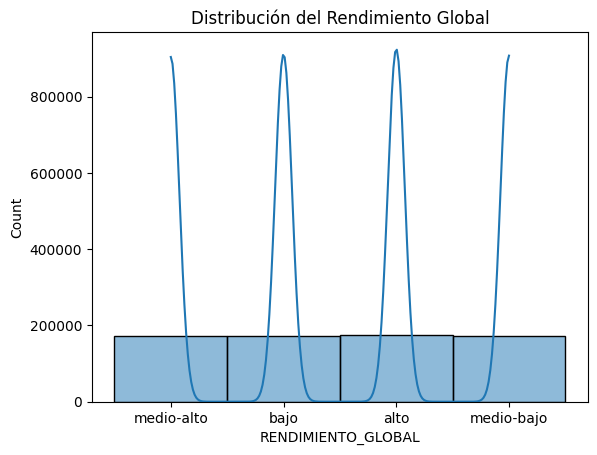

In [18]:
sns.histplot(data['RENDIMIENTO_GLOBAL'], kde=True)
plt.title('Distribución del Rendimiento Global')
plt.show()